## Import Modules

In [508]:
import math
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# To ignore all warnings
warnings.filterwarnings("ignore")

## Load Data

In [509]:
if not os.path.exists("data"):
    os.mkdir("data")
    data = pd.read_csv(
        'http://archive.ics.uci.edu/ml/machine-learning-databases/'
        'arrhythmia/arrhythmia.data', header = None, sep = ',', engine = 'python'
    ).to_csv("./data/train.csv", index = False)

data = pd.read_csv("./data/train.csv", header = None, sep = ',', engine = 'python')
print(data.head())
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

   0    1    2    3    4    5    6    7    8    9    ...    270    271    272  \
0    0    1    2    3    4    5    6    7    8    9  ...  270.0  271.0  272.0   
1   75    0  190   80   91  193  371  174  121  -16  ...    0.0    9.0   -0.9   
2   56    1  165   64   81  174  401  149   39   25  ...    0.0    8.5    0.0   
3   54    0  172   95  138  163  386  185  102   96  ...    0.0    9.5   -2.4   
4   55    0  175   94  100  202  380  179  143   28  ...    0.0   12.2   -2.2   

     273    274    275    276    277    278  279  
0  273.0  274.0  275.0  276.0  277.0  278.0  279  
1    0.0    0.0    0.9    2.9   23.3   49.4    8  
2    0.0    0.0    0.2    2.1   20.4   38.8    6  
3    0.0    0.0    0.3    3.4   12.3   49.0   10  
4    0.0    0.0    0.4    2.6   34.6   61.6    1  

[5 rows x 280 columns]
453 rows and 280 columns


In [510]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)
data.groupby(['arrhythmia']).size()
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

453 rows and 275 columns


In [511]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

[0 1]
(453, 274)


In [512]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 12)
sc = sklearn.preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.shape, y_train.shape, X_test_std.shape, y_test.shape)

(362, 274) (362,) (91, 274) (91,)


## Logistic Regressino Class

In [513]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
            if(i % 100 == 0): print(f"[Epochs {i}/{self.n_epoch}]: cost = {cost}")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        # TODO
        epsilon = 1e-15
        entropy = 0
        
        for i in range(len(y)):
            entropy += -(y.iloc[i] * np.log(output[i] + epsilon) + (1 - y.iloc[i]) * np.log(1 - output[i] + epsilon))
        
        return entropy

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        
        return 1.0 / (1.0 + np.exp(-z))
        

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        y_pred = np.zeros(len(X))
         
        net_input = self.net_input(X)
        output = self.activation(net_input)
        
        for i in range(len(X)):
            if(output[i] > 0.5): y_pred[i] = 1
            else : y_pred[i] = 0
        
        return y_pred
       

## Training

In [514]:
model = LogisticRegression(eta = 0.0075, n_epoch = 5000, random_state = 42)
model.fit(X_train_std, y_train)

[Epochs 0/5000]: cost = 253.34933969819886
[Epochs 100/5000]: cost = 78.66465403067703
[Epochs 200/5000]: cost = 56.37969408612095
[Epochs 300/5000]: cost = 37.51147514353198
[Epochs 400/5000]: cost = 33.72924689806152
[Epochs 500/5000]: cost = 29.550333656224616
[Epochs 600/5000]: cost = 26.93818900880469
[Epochs 700/5000]: cost = 24.777457767124183
[Epochs 800/5000]: cost = 22.947231807055907
[Epochs 900/5000]: cost = 21.371399770484054
[Epochs 1000/5000]: cost = 19.997594879425144
[Epochs 1100/5000]: cost = 18.787856846949335
[Epochs 1200/5000]: cost = 17.713674274084656
[Epochs 1300/5000]: cost = 16.753059151196645
[Epochs 1400/5000]: cost = 15.888697501338202
[Epochs 1500/5000]: cost = 15.106721806825798
[Epochs 1600/5000]: cost = 14.3958653602693
[Epochs 1700/5000]: cost = 13.746862215093113
[Epochs 1800/5000]: cost = 13.152010886512688
[Epochs 1900/5000]: cost = 12.604850511182962
[Epochs 2000/5000]: cost = 12.099916185774955
[Epochs 2100/5000]: cost = 11.632551254680429
[Epochs

## Plot the loss curve

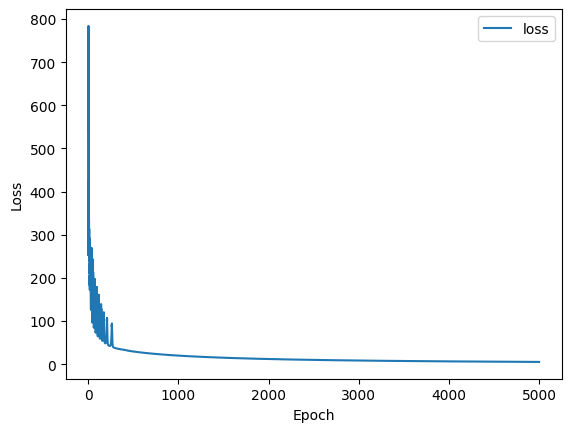

In [515]:
plt.plot(range(1, len(model.cost_) + 1), model.cost_, label = 'loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Plot the confusion matrix

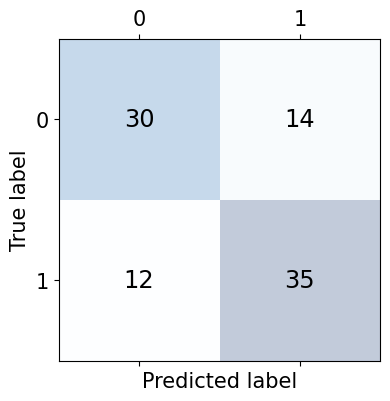

In [516]:
y_pred = model.predict(X_test_std)
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(matrix, cmap = plt.cm.Blues, alpha = 0.25)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x = j, y = i, s = matrix[i, j], va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

## Calculate F1-score

In [517]:
f1_score = sklearn.metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score:.5f}')

F1-score: 0.72917
